<a href="https://colab.research.google.com/github/BBloxham1/is4487/blob/main/week11assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


In [2]:
df = pd.read_csv('adviseinvest.csv')
df.columns

Index(['answered', 'income', 'female', 'age', 'job', 'num_dependents', 'rent',
       'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile',
       'product'],
      dtype='object')

In [3]:
# Remove rows with NAs.
df_clean = df.dropna()

# Remove the row with the single outlier in num_accts. Filter with a logical condition.
df_clean = df_clean[(df_clean['num_accts'] < 5)]

# Remove the rows with negative income values. Filter with a logical condition.
df_clean = df_clean[(df_clean['income'] > 0)]

# Remove product variable.
df_clean = df_clean.drop('product', axis=1)

# Make the 4 variables you have identified in the previous question into factors.
# Since the categories are unordered,  turn these variables into nominal factors.
df_clean['job'] = df_clean['job'].astype('category')
df_clean['chk_acct'] = df_clean['chk_acct'].astype('category')
df_clean['sav_acct'] = df_clean['sav_acct'].astype('category')

In [11]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income', 'female', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']]
y = df_clean['answered']

money_tree = DecisionTreeClassifier(criterion="entropy")

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)

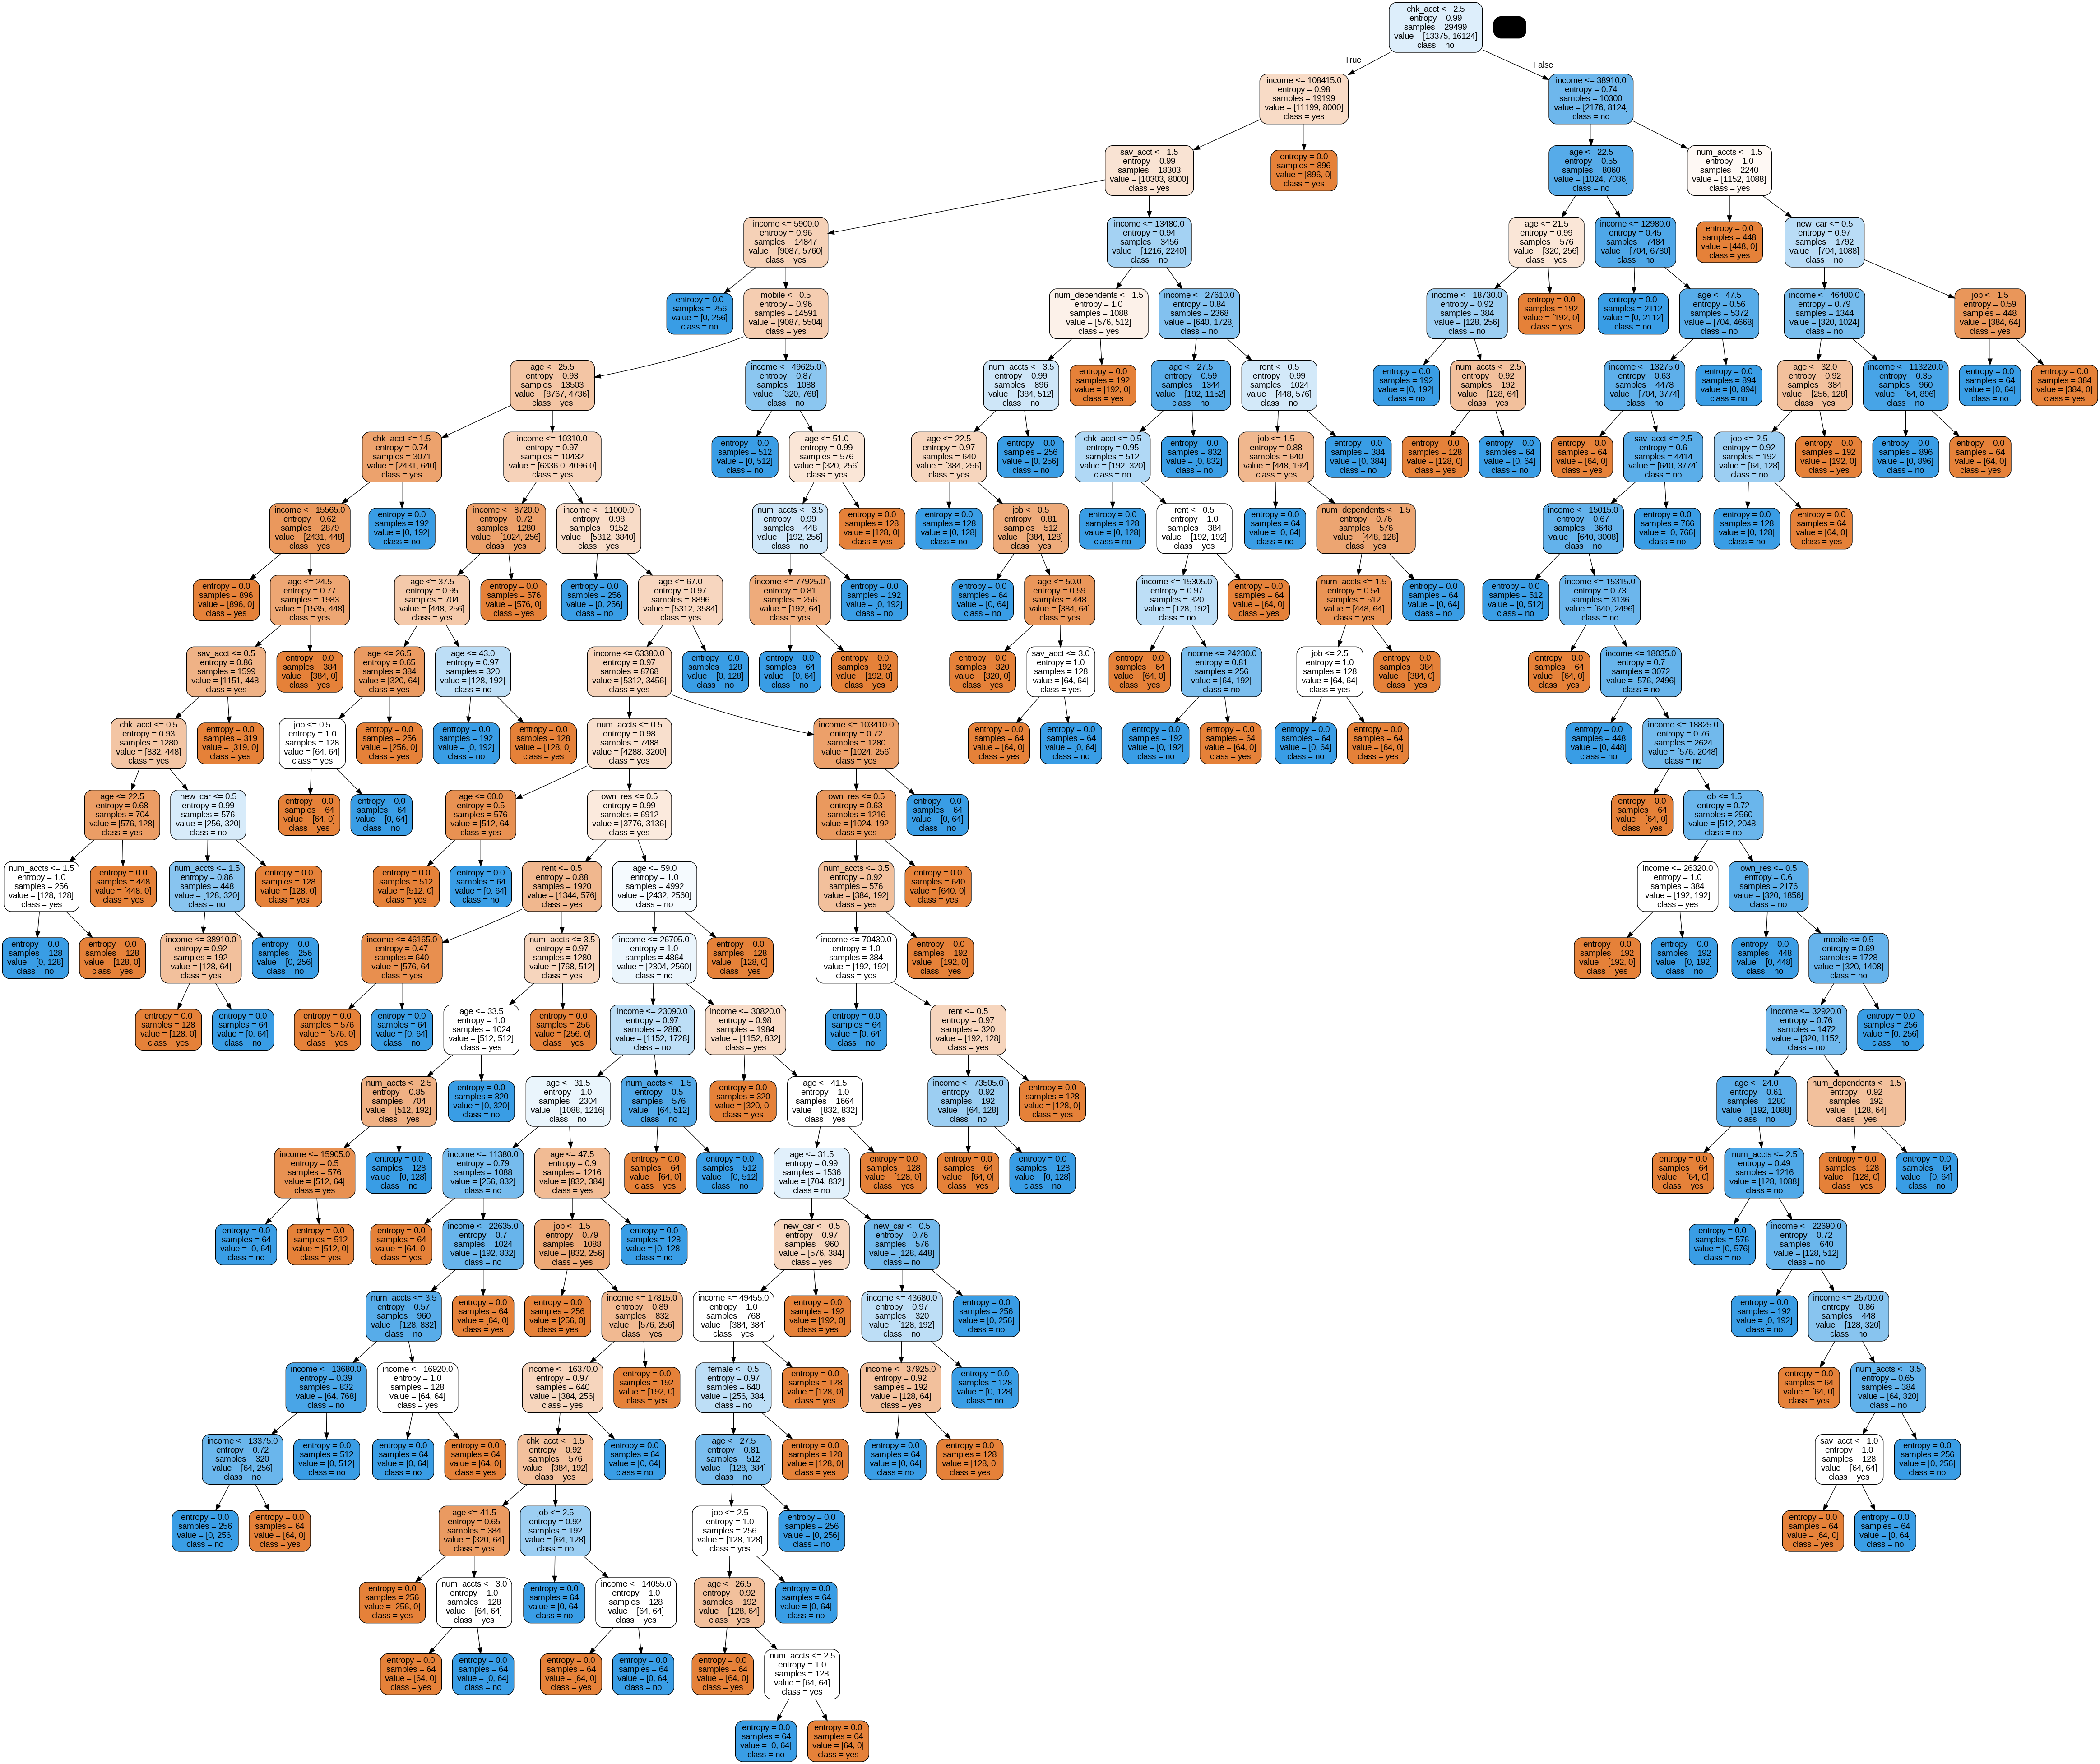

In [12]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree, out_file=dot_data,
                   feature_names=x.columns,class_names=['yes','no'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [13]:
# Get feature importances from the trained tree model
feature_importances = money_tree.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Print the top 3 most important predictors
print("Top 3 most important predictors:")
print(feature_importance_df.head(3))

Top 3 most important predictors:
    feature  importance
0    income    0.362708
2       age    0.186911
8  chk_acct    0.124927
